## Moving Averages

    Moving averages serve as the baseline models in time series analysis. They are widely used for smoothing time series data and identifying trends by reducing noise. Below are the primary types of moving averages and their core assumptions:

### Types of Moving Averages

- Simple Moving Average (SMA)

    - SMA is calculated by taking the arithmetic mean of a fixed number of consecutive data points.

    - It is a straightforward method to smooth data but gives equal weight to all observations within the window.

- Weighted Moving Average (WMA)

    - WMA assigns different weights to data points within the window, typically giving more importance to recent observations.

    - Useful when recent data is more relevant than older data.

- Exponential Moving Average (EMA)

    - EMA applies exponential weighting, giving exponentially more weight to recent data points.

    - Suitable for capturing trends in volatile datasets as it responds faster to recent changes.

- Exponential Smoothing Moving Average (ESMA)

    - A variation of EMA, ESMA uses smoothing factors to adaptively adjust the weights applied to observations.

    - Often employed in forecasting models to adapt to changing trends dynamically.

### Core Assumptions of Moving Averages

#### Stationary Data:

    - Moving averages work best with stationary data where the statistical properties (mean, variance) do not change over time.

#### Slow-Varying Mean:

    - They are effective when the underlying data exhibits a slow-varying mean, making it easier to detect trends.

### Limitations

- Non-Stationary Data: Moving averages perform poorly on non-stationary data, where the mean and variance change over time.

- Fast-Varying Mean: They struggle with datasets exhibiting rapid changes in mean, as they smooth out such variations.

### Visualizing Moving Averages on Non-Stationary Data

- To better understand the behavior of moving averages, consider applying them to non-stationary data. When dealing with non-stationary data, the following can be observed:

- SMA, WMA, EMA, and ESMA will exhibit significant differences.

- The lag effect becomes more pronounced as the data deviates from stationarity.

- If stationary data is used, all moving averages will appear similar, highlighting the smoothed trend without major distinctions among the methods.

### Practical Applications

- Feature Engineering for Machine Learning Models: Moving averages can be utilized as features in machine learning models to capture trends over time.

- Customer Behavior Analysis: For example, in the RFM (Recency, Frequency, Monetary) model, moving averages can help assess customer visit frequency and spending patterns.

By understanding the nuances of different moving averages, analysts can make informed decisions about their applications and limitations in time series analysis.



In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
path = r'datasets\electricity_consumption.csv'
df = pd.read_csv(path)

In [8]:
# Parsing the Bill_Date column into a datetime object
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [11]:
# Set the 'Bill_Date' column as the index of the DataFrame
df.set_index('Bill_Date', inplace=True)

In [12]:
df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [13]:
df.isnull().sum()

On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

In [16]:
# pick the column Billing_amount for the analysis only for 2 years
df_16_18 = df["2016":"2018"][['Billed_amount']] 

In [17]:
df_16_18.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


### Applying the Simple Moving Average

In [27]:
# applying the rolling windows of 3
df_roll_3 = df_16_18["Billed_amount"].rolling(window=3).mean()
df_roll_3

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [28]:
# Apply the shift of 1 to the rolling window of 3 which means the data is shifted by 1 means the data of the previous month is used to predict the next month
df_16_18["SMA_3"]= df["Billed_amount"].rolling(window=3).mean().shift(1)
df_16_18

,Billed_amount,SMA_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


<Axes: xlabel='Bill_Date'>

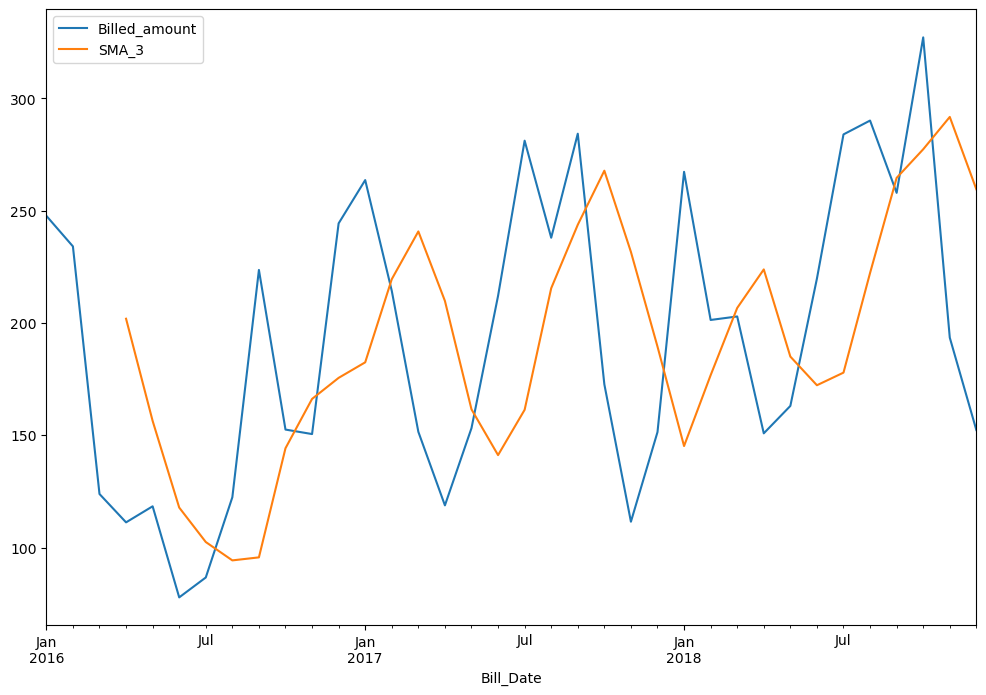

In [31]:
# Plotting the data
df_16_18.plot(figsize=(12,8))

### Weighted Moving Average


In [33]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc
    

In [61]:
# aplly the weight to the data 
df_16_18["WMA_3"] = df["Billed_amount"].rolling(window = 3).apply(wma(np.array([0.3,0.85,1.55]))).shift(1)    

In [62]:
df_16_18

,Billed_amount,SMA_3,WMA_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,155.093333
2016-05-01,118.37,156.393333,115.965500
2016-06-01,77.81,117.813333,105.055167
2016-07-01,86.67,102.466667,84.862000
2016-08-01,122.40,94.283333,78.662667
2016-09-01,223.62,95.626667,95.577500


<Axes: xlabel='Bill_Date'>

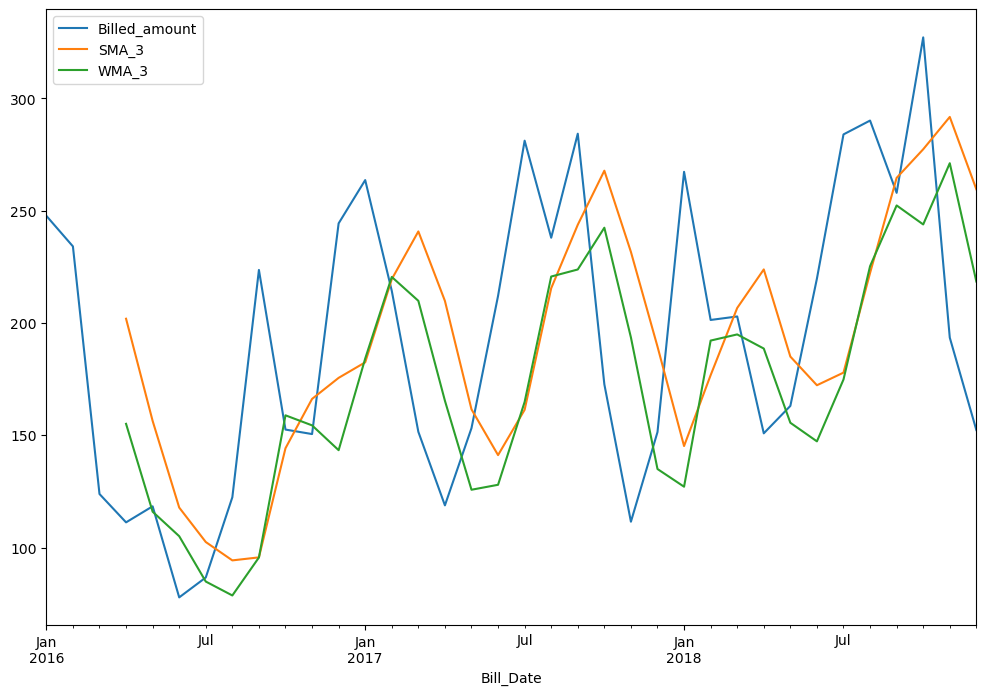

In [63]:
# plot the data
df_16_18.plot(figsize=(12,8))

### Exponential Moving Average

In [65]:
df_16_18["EMA_3"] = df["Billed_amount"].ewm(span=3, adjust=False, min_periods= 0).mean().shift(1)
df_16_18

,Billed_amount,SMA_3,WMA_3,EMA_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,155.093333,182.385000
2016-05-01,118.37,156.393333,115.965500,146.802500
2016-06-01,77.81,117.813333,105.055167,132.586250
2016-07-01,86.67,102.466667,84.862000,105.198125
2016-08-01,122.40,94.283333,78.662667,95.934063
2016-09-01,223.62,95.626667,95.577500,109.167031


<Axes: xlabel='Bill_Date'>

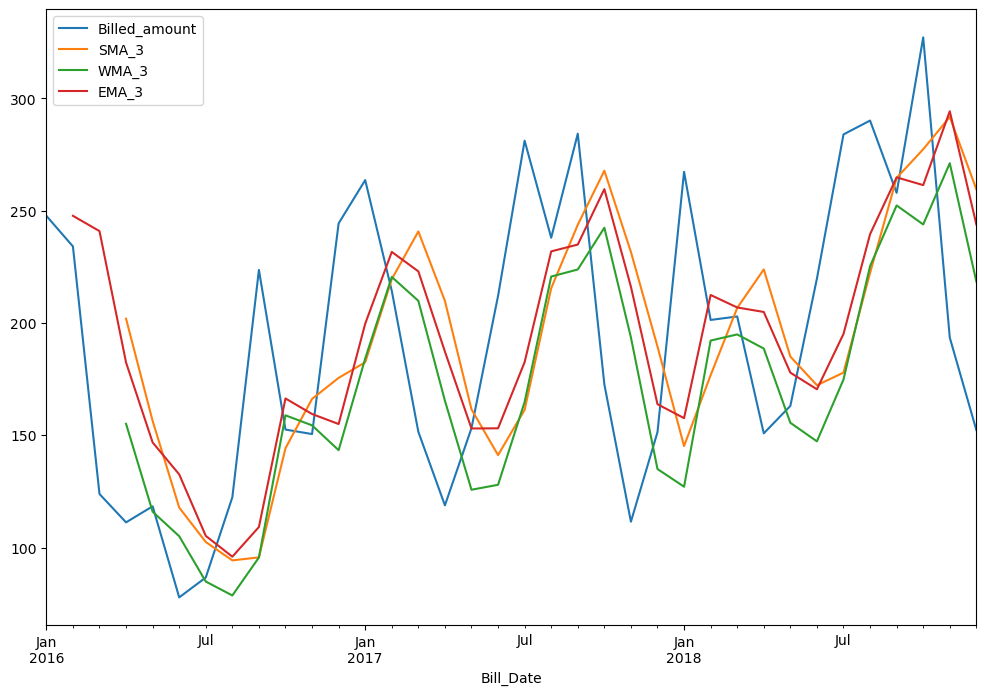

In [66]:
# Plotiing the data
df_16_18.plot(figsize=(12,8))

## Exponential Smoothing Moving Average

In [79]:
# alpha: it is a smoothing factor between 0 and 1. higher the alpha, more the weight given to the most recent data and vice versa.
df_16_18['ESMA_3_7'] = df['Billed_amount'].ewm(alpha = 0.95,adjust=False, min_periods=3).mean().shift(1)
df_16_18

,Billed_amount,SMA_3,WMA_3,EMA_3,ESMA_3,ESMA_3_7
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN,NaN
2016-04-01,111.22,201.896667,155.093333,182.385000,158.153800,129.397050
2016-05-01,118.37,156.393333,115.965500,146.802500,125.300140,112.128852
2016-06-01,77.81,117.813333,105.055167,132.586250,120.449042,118.057943
2016-07-01,86.67,102.466667,84.862000,105.198125,90.601713,79.822397
2016-08-01,122.40,94.283333,78.662667,95.934063,87.849514,86.327620
2016-09-01,223.62,95.626667,95.577500,109.167031,112.034854,120.596381


<Axes: xlabel='Bill_Date'>

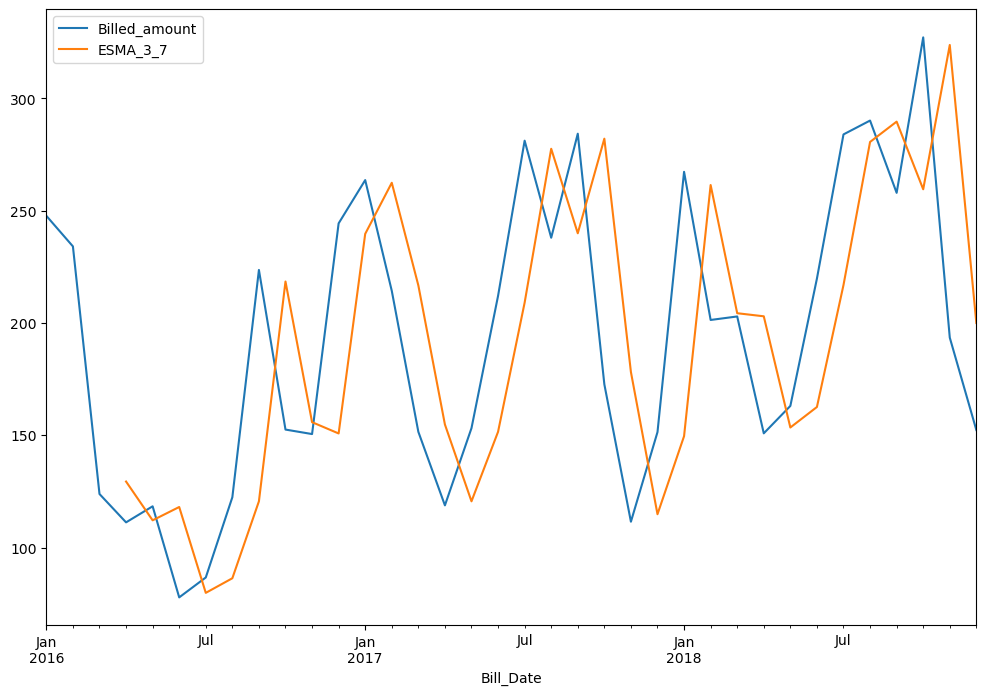

In [80]:
# plott only the ESMA_3 and Billed_amount
df_16_18[['Billed_amount','ESMA_3_7']].plot(figsize=(12,8))

In [81]:
# also check with the lower alpha value
df_16_18['ESMA_3_3'] = df['Billed_amount'].ewm(alpha = 0.3,adjust=False, min_periods=3).mean().shift(1)
df_16_18

,Billed_amount,SMA_3,WMA_3,EMA_3,ESMA_3,ESMA_3_7,ESMA_3_3
Bill_Date,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN,NaN,NaN
2016-04-01,111.22,201.896667,155.093333,182.385000,158.153800,129.397050,207.705800
2016-05-01,118.37,156.393333,115.965500,146.802500,125.300140,112.128852,178.760060
2016-06-01,77.81,117.813333,105.055167,132.586250,120.449042,118.057943,160.643042
2016-07-01,86.67,102.466667,84.862000,105.198125,90.601713,79.822397,135.793129
2016-08-01,122.40,94.283333,78.662667,95.934063,87.849514,86.327620,121.056191
2016-09-01,223.62,95.626667,95.577500,109.167031,112.034854,120.596381,121.459333


<Axes: xlabel='Bill_Date'>

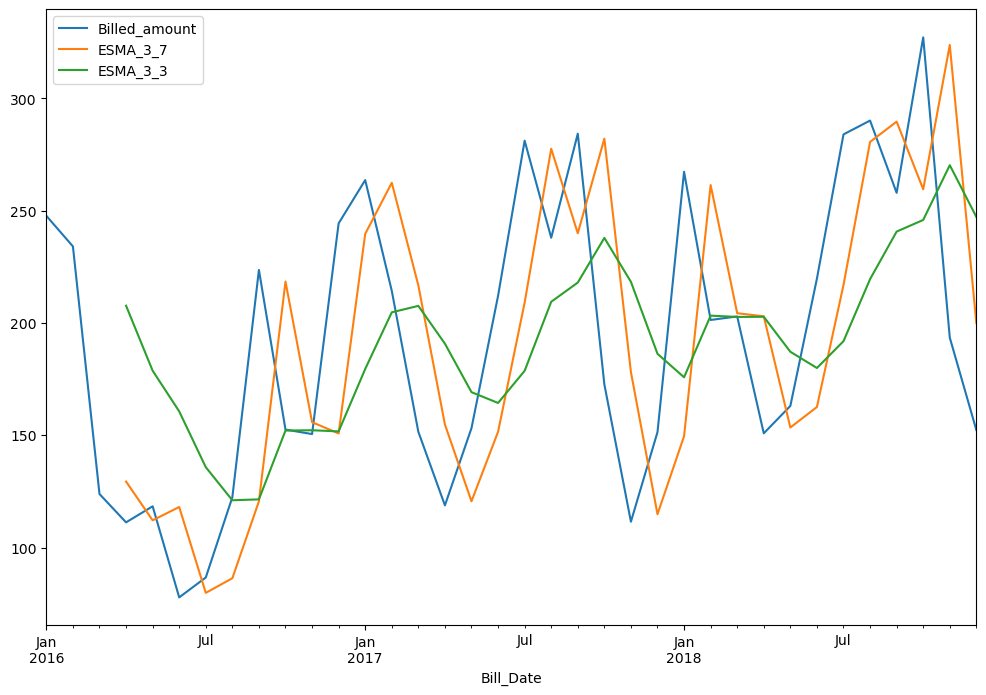

In [82]:
# plot the three columns
df_16_18[['Billed_amount','ESMA_3_7','ESMA_3_3']].plot(figsize=(12,8))

In [84]:
df_16_18.head()

,Billed_amount,SMA_3,WMA_3,EMA_3,ESMA_3,ESMA_3_7,ESMA_3_3
Bill_Date,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.7300,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.9200,NaN,NaN,NaN
2016-04-01,111.22,201.896667,155.093333,182.3850,158.15380,129.397050,207.70580
2016-05-01,118.37,156.393333,115.965500,146.8025,125.30014,112.128852,178.76006


<Axes: xlabel='Bill_Date'>

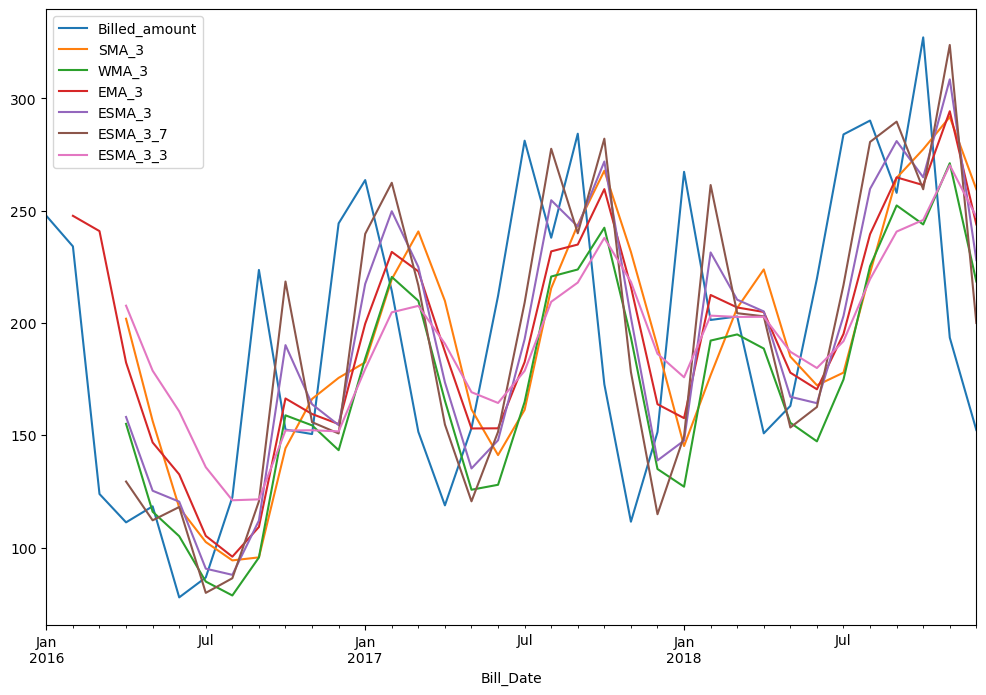

In [85]:
# plot all the data
df_16_18.plot(figsize=(12,8))

### RMSE

In [88]:
# Check the RMSE value for the moving average columns
((df_16_18['Billed_amount'] - df_16_18['SMA_3'])**2).mean()**0.5

70.98561687433802

In [89]:
# RMSE for the weighted moving average
((df_16_18['Billed_amount'] - df_16_18['WMA_3'])**2).mean()**0.5

65.22625144191025

In [90]:
((df_16_18['Billed_amount'] - df_16_18['EMA_3'])**2).mean()**0.5



64.32131239414655

In [91]:
((df_16_18['Billed_amount'] - df_16_18['ESMA_3_7'])**2).mean()**0.5



60.22787332083125